## 1- Importing Libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Tensorflow Model

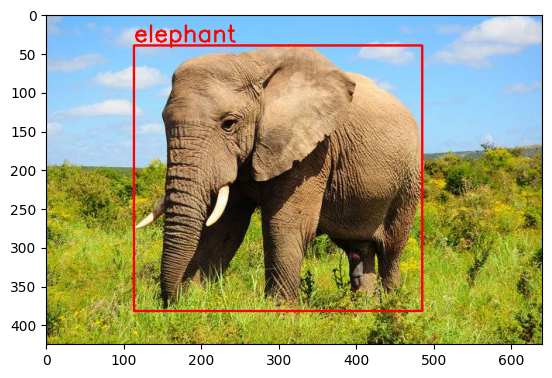

In [2]:
model = cv2.dnn.readNetFromTensorflow('models/tensorflow/frozen_inference_graph.pb', 'models/tensorflow/ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

# load the COCO class names
with open('models/tensorflow/object_detection_classes_coco.txt', 'r') as f:
    class_names = f.read().split('\n')
    
image = cv2.imread('images/elephant.jpg')
image_height, image_width, _ = image.shape

model.setInput(cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True, crop=False))
output = model.forward()

for detection in output[0,0,:,:]:
    score = float(detection[2])
    if score > 0.3:
        class_id = detection[1]
        class_name = class_names[int(class_id)-1]

        left = detection[3] * image_width
        top = detection[4] * image_height
        right = detection[5] * image_width
        bottom = detection[6] * image_height
        
        cv2.rectangle(image, (int(left), int(top)), (int(right), int(bottom)), (0, 0, 255), thickness=2)
        cv2.putText(image, class_name, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.imshow(image[...,::-1]);

## 3- Loading Model on Serveral Object

person 92.6 %
person 81.75 %
person 69.67 %
person 61.7 %
traffic light 59.26 %
person 57.5 %
car 57.13 %
car 57.09 %
car 50.94 %
car 50.14 %
person 43.99 %
car 34.93 %
person 32.74 %
person 32.71 %


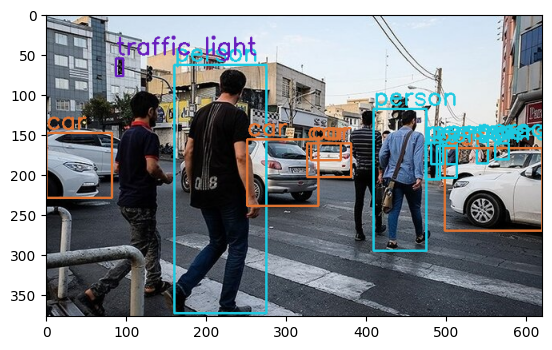

In [10]:
model = cv2.dnn.readNetFromTensorflow('models/tensorflow/frozen_inference_graph.pb', 'models/tensorflow/ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

# load the COCO class names
with open('models/tensorflow/object_detection_classes_coco.txt', 'r') as f:
    class_names = f.read().split('\n')
    
# get a different color array for each of the classes
COLORS = np.random.uniform(0, 255, size=(len(class_names), 3))
    
image = cv2.imread('images/pedestrian.jpg')
image_height, image_width, _ = image.shape

model.setInput(cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True, crop=False))
output = model.forward()

for detection in output[0,0,:,:]:
    score = float(detection[2])
    if score > 0.3:
        class_id = detection[1]
        class_name = class_names[int(class_id)-1]
        color = COLORS[int(class_id)]

        left = detection[3] * image_width
        top = detection[4] * image_height
        right = detection[5] * image_width
        bottom = detection[6] * image_height
        
        cv2.rectangle(image, (int(left), int(top)), (int(right), int(bottom)), color, thickness=2)
        cv2.putText(image, class_name, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        print(class_name, round(score*100,2),"%")
        
plt.imshow(image[...,::-1]);